In [8]:
#Analyze how many musicians, by country, are listed as Best Selling Artists.
#The data source comes from: https://www.kaggle.com/datasets/kabhishm/best-selling-music-artists-of-all-time.

import pandas as pd
import matplotlib.pyplot as plt

best_selling_artists = pd.DataFrame(pd.read_csv("best_selling_artists.csv"))

best_selling_artists.head(10)

#Will focus on/keep columns: Artist, Country, Genre, Sales.
#Will drop columns: period_active, year, TCU.

cols_to_drop = ['period_active','Year','TCU']

best_selling_artists = best_selling_artists.drop(columns = cols_to_drop)

#Drop rows, if any, with NaN values
best_selling_artists_cleaned = best_selling_artists.dropna()

#Filter to only United States in Country
us_artists = best_selling_artists[best_selling_artists['Country'] == "United States"]
us_artists.head(121)


,Artist,Country,Genre,Sales
1,Elvis Presley,United States,Rock and roll / pop / country,500 million
2,Michael Jackson,United States,Pop / rock / dance / soul / R&B,400 million
5,Madonna,United States,Pop / dance / electronica,300 million250 million
9,Eminem,United States,Hip-hop,220 million
10,Mariah Carey,United States,R&B / pop / soul / hip-hop,220 million
...,...,...,...,...
112,Green Day,United States,Punk rock / pop punk / alternative rock,75 million
117,Gloria Estefan,United States,Latin pop / dance pop,75 million
118,Barry Manilow,United States,Pop / soft rock,75 million
119,Kiss,United States,Hard rock / heavy metal,75 million


In [9]:
#Rename column Sales to Sales per million
best_selling_artists.rename(columns={'Sales' : 'Sales per Million'}, inplace=True)
best_selling_artists.head(121)

,Artist,Country,Genre,Sales per Million
0,The Beatles,United Kingdom,Rock / pop,600 million500 million
1,Elvis Presley,United States,Rock and roll / pop / country,500 million
2,Michael Jackson,United States,Pop / rock / dance / soul / R&B,400 million
3,Elton John,United Kingdom,Pop / rock,300 million250 million
4,Queen,United Kingdom,Rock,300 million250 million
...,...,...,...,...
116,The Police,United Kingdom,Pop / rock,75 million
117,Gloria Estefan,United States,Latin pop / dance pop,75 million
118,Barry Manilow,United States,Pop / soft rock,75 million
119,Kiss,United States,Hard rock / heavy metal,75 million


In [10]:
#Convert Sales per Million to an integer
sales_per_million = pd.DataFrame({'Sales per million': ['100000000', '160000000', '170000000','200000000','220000000','250000000', '400000000', '500000000', '600000000']})
sales_per_million['Sales per million'] = sales_per_million['Sales per million'].astype(int)
sales_per_million.head(10)

,Sales per million
0,100000000
1,160000000
2,170000000
3,200000000
4,220000000
5,250000000
6,400000000
7,500000000
8,600000000


In [11]:
#Identify the column 'Sales per million' for artists in the United States.
sales_per_million = pd.DataFrame({'Sales per million': [100000000, 160000000, 170000000, 200000000, 220000000, 250000000, 400000000, 500000000, 600000000]})
#Calculate the total number of sales per million.
#Calculate the mean number of sales per million.
#Calculate the median number of sales per million.
Sales_per_million_sum = sales_per_million['Sales per million'].sum()
Sales_per_million_mean = sales_per_million['Sales per million'].mean()
Sales_per_million_median = sales_per_million['Sales per million'].median()
                         
print(f"Sum: {Sales_per_million_sum}")
print(f"Mean: {Sales_per_million_mean}")
print(f"Median: {Sales_per_million_median}")

Sum: 2600000000
Mean: 288888888.8888889
Median: 220000000.0


In [12]:
# Filter data to exclude artists from the United States (filtered-out countries)
non_us_artists = best_selling_artists[best_selling_artists['Country'] != 'United States']

non_us_artists.head(21)

,Artist,Country,Genre,Sales per Million
0,The Beatles,United Kingdom,Rock / pop,600 million500 million
3,Elton John,United Kingdom,Pop / rock,300 million250 million
4,Queen,United Kingdom,Rock,300 million250 million
6,Led Zeppelin,United Kingdom,Hard rock / blues rock / folk rock,300 million200 million
7,Rihanna,Barbados,R&B / pop / dance / hip-hop,250 million230 million
8,Pink Floyd,United Kingdom,Progressive rock / psychedelic rock,250 million200 million
15,Celine Dion,Canada,Pop / Rock,200 million175 million
16,AC/DC,Australia,Hard rock / blues rock / rock and roll,200 million
17,The Rolling Stones,United Kingdom,Rock / blues rock,200 million
18,Drake,Canada,Hip-hop / R&B / pop,170 million


In [15]:
# Combine the two subsets back into a single DataFrame
combined_artists = pd.concat([us_artists, non_us_artists]).reset_index(drop=True)

sales_per_million = pd.DataFrame({'Sales per million': ['100000000', '160000000', '170000000','200000000','220000000','250000000', '400000000', '500000000', '600000000']})
sales_per_million['Sales per million'] = sales_per_million['Sales per million'].astype(int)
sales_per_million.head(10)

# Display the combined DataFrame
combined_artists.head(121)

,Artist,Country,Genre,Sales,Sales per Million
0,Elvis Presley,United States,Rock and roll / pop / country,500 million,NaN
1,Michael Jackson,United States,Pop / rock / dance / soul / R&B,400 million,NaN
2,Madonna,United States,Pop / dance / electronica,300 million250 million,NaN
3,Eminem,United States,Hip-hop,220 million,NaN
4,Mariah Carey,United States,R&B / pop / soul / hip-hop,220 million,NaN
...,...,...,...,...,...
116,Robbie Williams,United Kingdom,Pop rock,NaN,75 million
117,Enya,Ireland,New-age / Celtic,NaN,75 million
118,Bryan Adams,Canada,Rock,NaN,75 million
119,Bob Marley,Jamaica,Reggae,NaN,75 million


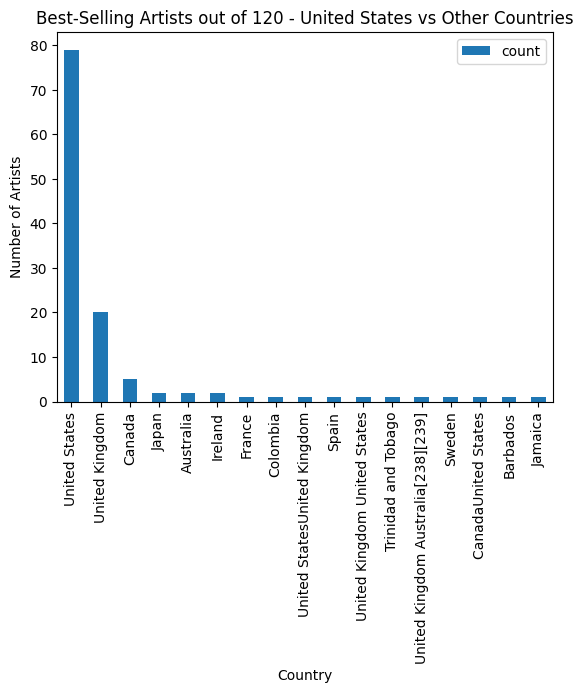

In [14]:
#Bar chart to compare how many best selling artists are from the United States vs other countries.
pop_artists_by_country = best_selling_artists_cleaned

count_by_country = pop_artists_by_country['Country'].value_counts()



count_by_country.plot(kind='bar')

plt.legend()
plt.xlabel('Country')
plt.ylabel('Number of Artists')
plt.title('Best-Selling Artists out of 120 - United States vs Other Countries')

plt.show()